In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



In [ ]:
# install chatgpt python

In [2]:
# Read in the data
df = pd.read_csv('./processed/disasters_country_month.csv')

In [3]:

disasters = ['Drought', 'Earthquake', 'Extreme temperature', 'Extreme weather', 'Flood', 'Impact', 'Landslide', 'Mass movement (dry)', 'Volcanic activity', 'Wildfire']
#leave only the disasters in the dataframe

disasters = df.columns.intersection(disasters)


# add a column for the most common disaster
df['most_common_disaster'] = df[disasters].idxmax(axis=1)

# add a column for the second most common disaster
df['second_most_common_disaster'] = df[disasters].apply(lambda x: x.nlargest(2).index[-1], axis=1)

# add a column for the third most common disaster
df['third_most_common_disaster'] = df[disasters].apply(lambda x: x.nlargest(3).index[-1], axis=1)

# add a column for the total number of disasters
df['Total'] = df[disasters].sum(axis=1)

In [23]:
# Bar plot of the number of disasters for Japan

def barplotCountry(country):
    plt.figure(figsize=(15, 5))
    plt.title('Number of Disasters per Month in ' + country)
    
    sns.barplot(x='Start Month', y='Total', data=df[df['Country'] == country])

def three_most_common_disasters(country, month):
    return df[(df['Country'] == country) & (df['Start Month'] == month)][['most_common_disaster', 'second_most_common_disaster', 'third_most_common_disaster']].values.tolist()[0]

def deathsPerMonth(country):
    plt.figure(figsize=(15, 5))
    plt.title('Mean number of Deaths per Month in ' + country)
    
    sns.barplot(x='Start Month', y='mean_deaths_per_month', data=df[df['Country'] == country])
    



['Earthquake', 'Landslide', 'Volcanic activity']

In [24]:
# jupyter Widget to input a country and a month as a dropdown menu

countries = df['Country'].unique()
months = df['Start Month'].unique()

def f(country, month):
    barplotCountry(country)
    print(three_most_common_disasters(country, month))
    deathsPerMonth(country)


In [10]:
#interact(f, country=Dropdown(options=countries), month=Dropdown(options=months))

['Earthquake', 'Landslide', 'Drought']


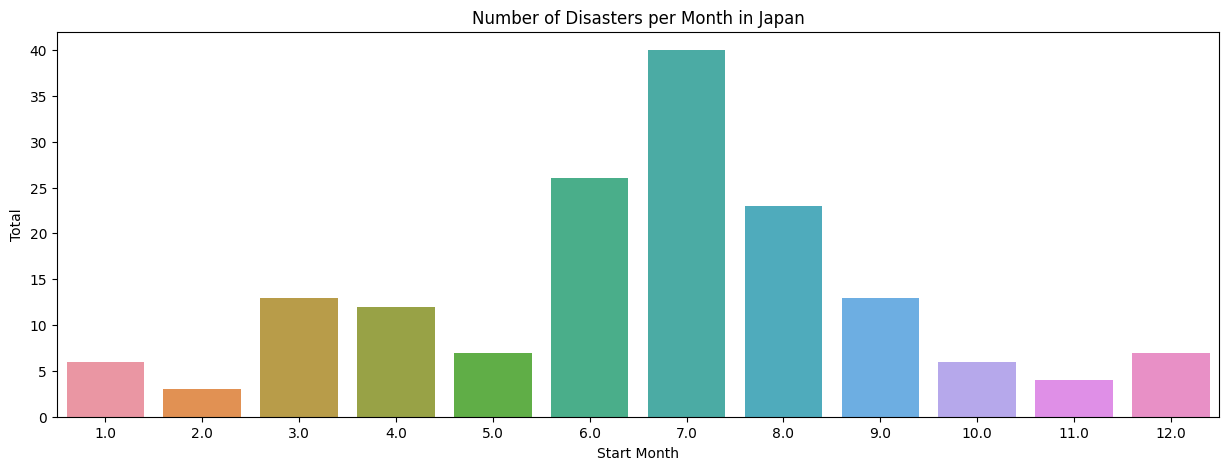

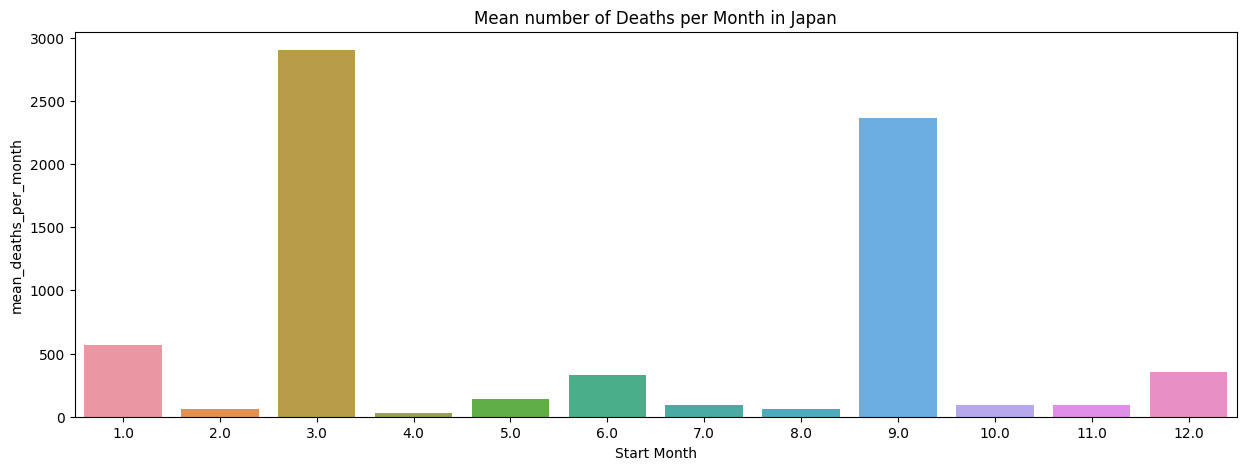

In [25]:
# for a given country and month, show the three most common disasters
f('Japan', 2)
